In [1]:
from utils import load_lda_model
import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel,LdaModel
pyLDAvis.enable_notebook()

/opt/miniconda3/envs/topic/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [2]:
lda = load_lda_model(r"/Users/jamesmoro/Documents/Python/Topic_Modelling/Results/model")
doc_term_matrix = load_lda_model(r"/Users/jamesmoro/Documents/Python/Topic_Modelling/Results/model.id2word")
docs = pickle.load(open("cleaned_docs.pkl", 'rb'))
index_dict = pickle.load(open("index_dict.pkl", 'rb'))

In [3]:
corpus = [index_dict.doc2bow(doc) for doc in docs]
top_topics = lda.top_topics(corpus)

In [4]:
gensimvis.prepare(lda, corpus, index_dict)

/opt/miniconda3/envs/topic/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/opt/miniconda3/envs/topic/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/miniconda3/envs/topic/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/miniconda3/envs/topic/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/miniconda3/envs/topic/lib/python3.9/

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.006071  0.058047       1        1  8.621325
12     0.030791  0.018821       2        1  8.513166
6      0.007616  0.076805       3        1  7.702000
15    -0.005034 -0.036311       4        1  7.488242
10     0.051753  0.046349       5        1  7.301786
3      0.008958  0.049215       6        1  7.163429
19    -0.087452 -0.026614       7        1  6.497896
5     -0.050029 -0.043878       8        1  6.330334
1      0.052130  0.078833       9        1  6.017148
13    -0.057764  0.088893      10        1  5.589784
8     -0.006542 -0.036077      11        1  5.553404
4      0.062720  0.012922      12        1  4.526543
9     -0.020310  0.034497      13        1  4.422479
7     -0.107802 -0.145411      14        1  3.722525
17    -0.164885 -0.051861      15        1  3.350823
2      0.171253 -0.052555      16        1  3.341880
18    -0.040018  0.106900      17        1  3.143530
16     0.122236 -0.147491      18        1  0.711380
11     0.019036 -0.015591      19        1  0.001176
14     0.019414 -0.015493      20        1  0.001153, topic_info=          Term        Freq       Total Category  logprob  loglift
508     number  322.000000  322.000000  Default  30.0000  30.0000
1308       dog  167.000000  167.000000  Default  29.0000  29.0000
18        body  249.000000  249.000000  Default  28.0000  28.0000
1252     truck  110.000000  110.000000  Default  27.0000  27.0000
833   internet   97.000000   97.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
678       word    0.000274  159.975536  Topic20  -7.6938  -1.9062
466      learn    0.000274  112.457843  Topic20  -7.6944  -1.5543
283   business    0.000274   96.214133  Topic20  -7.6962  -1.4001
697        age    0.000273   77.118635  Topic20  -7.6970  -1.1798
86        high    0.000273  100.913358  Topic20  -7.6987  -1.4503

[1181 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1004      1  0.069575  10000
1004      2  0.069575  10000
1004      8  0.626178  10000
1004     10  0.139151  10000
1004     17  0.069575  10000
...     ...       ...    ...
210      13  0.035820  youll
210      14  0.011940  youll
210      15  0.035820  youll
210      16  0.035820  youll
210      17  0.119401  youll

[6056 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 13, 7, 16, 11, 4, 20, 6, 2, 14, 9, 5, 10, 8, 18, 3, 19, 17, 12, 15])

In [11]:
def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    STEP = 10
    for num_topics in range(2, limit, STEP):
        lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,passes = 20, iterations = 400)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(2, limit, STEP)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

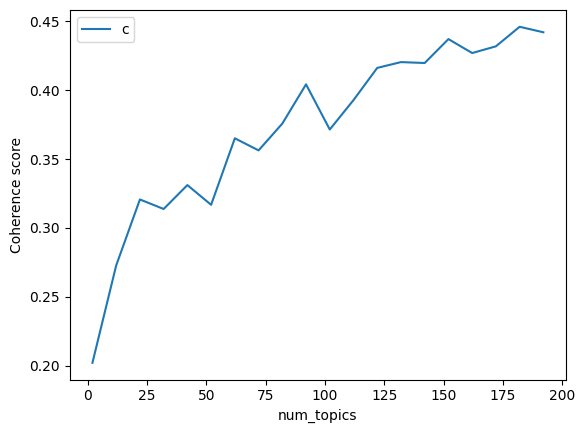

([<gensim.models.ldamodel.LdaModel at 0x7f9735d478e0>,
 [0.20197496816462418,
  0.27265433683082435,
  0.32062593004058476,
  0.3136962374821004,
  0.3310617392669725,
  0.31672543629816313,
  0.3650502507782718,
  0.356271910717972,
  0.3757180510981901,
  0.404239357235499,
  0.3714422927313656,
  0.3928016434666216,
  0.41618909949876304,
  0.420398393463393,
  0.4197490220081615,
  0.43711961263893645,
  0.4269857216557868,
  0.43185595080401196,
  0.44605801831341846,
  0.44205935289277054])

In [13]:
evaluate_graph(dictionary=index_dict, corpus=corpus, texts=docs, limit = 200)